In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import blimpy as bl
import pandas as pd
from astropy import units as u

import sys, os, glob, errno
import csv
import json
import h5py
import time
from astropy.stats import sigma_clip


from scipy.signal import butter, lfilter, filtfilt
import scipy.signal

sys.path.insert(0, "/home/bryanb/setigen/")
import setigen as stg

def db(x):
    """ Convert linear value to dB value """
    return 10*np.log10(x)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


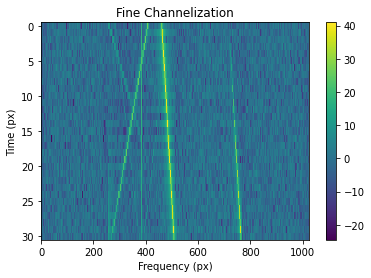

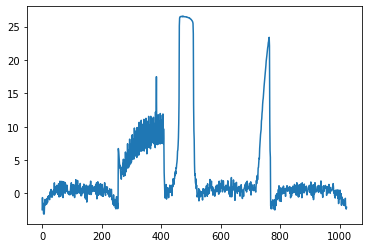

In [68]:
M     = 8        # Number of taps
P     = 1024       # Number of 'branches', also fft length
W     = 2000       # Number of windows of length M*P in input time stream
n_int = 2          # Number of time integrations on output data
sample_rate = 3e9

stream = stg.voltage.DataStream(sample_rate=3e9)
stream.add_noise(v_mean=0, 
                 v_std=1)
# stream.add_signal(f_start=0.598*u.GHz, 
#                   drift_rate=1e8*u.Hz/u.s, 
#                   level=1)
stream.add_signal(f_start=(sample_rate/P * (204.3))*u.Hz, 
                  drift_rate=50000000*u.Hz/u.s, 
                  level=1)
stream.get_samples(num_samples=M*P*W)

digitize_stream = stg.voltage.sigproc.quantize_real(stream.v,
                                                    target_fwhm=30,
                                                    n_bits=8)

pfb_voltages = stg.voltage.sigproc.get_pfb_voltages(digitize_stream,
                                                    M,
                                                    P)

# Perform quantization
n_bits = 4
target_fwhm = 30 * 2**n_bits / 2**8 
q_pfb_voltages = stg.voltage.sigproc.quantize_complex(pfb_voltages, 
                                                      target_fwhm=target_fwhm,
                                                      n_bits=n_bits)

# Here is where we would write to raw files!

XX_psd = stg.voltage.sigproc.get_pfb_waterfall(pfb_voltages=q_pfb_voltages,
                                               n_int=n_int,
                                               fftlength=256,
                                               start_channel=203,
                                               num_channels=4)
plt.imshow(db(XX_psd), 
           cmap='viridis', 
           aspect='auto', 
           interpolation='none')
plt.colorbar()
plt.xlabel("Frequency (px)")
plt.ylabel("Time (px)")
plt.title("Fine Channelization")
plt.show()

plt.plot(db(np.mean(XX_psd, axis=0)))
plt.show()

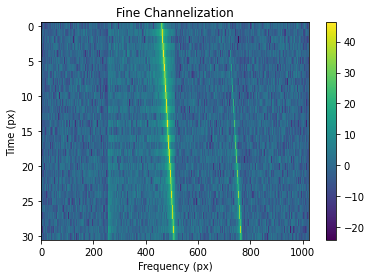

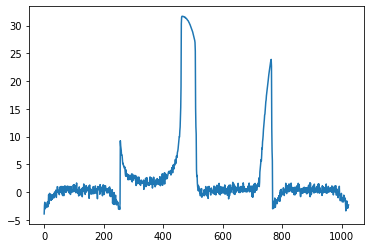

In [69]:
M     = 8        # Number of taps
P     = 1024       # Number of 'branches', also fft length
W     = 2000       # Number of windows of length M*P in input time stream
n_int = 2          # Number of time integrations on output data
sample_rate = 3e9

stream = stg.voltage.DataStream(sample_rate=3e9)
stream.add_noise(v_mean=0, 
                 v_std=1)
# stream.add_signal(f_start=0.598*u.GHz, 
#                   drift_rate=1e8*u.Hz/u.s, 
#                   level=1)
stream.add_signal(f_start=(sample_rate/P * (204.3))*u.Hz, 
                  drift_rate=50000000*u.Hz/u.s, 
                  level=1)
stream.get_samples(num_samples=M*P*W)

# digitize_stream = stg.voltage.sigproc.quantize_real(stream.v,
#                                                     target_fwhm=30,
#                                                     n_bits=8)

pfb_voltages = stg.voltage.sigproc.get_pfb_voltages(stream.v,
                                                    M,
                                                    P)

# Perform quantization
# n_bits = 8
# target_fwhm = 30 * 2**n_bits / 2**8 
# q_pfb_voltages = stg.voltage.sigproc.quantize_complex(pfb_voltages, 
#                                                       target_fwhm=target_fwhm,
#                                                       n_bits=n_bits)

# Here is where we would write to raw files!

XX_psd = stg.voltage.sigproc.get_pfb_waterfall(pfb_voltages=pfb_voltages,
                                               n_int=n_int,
                                               fftlength=256,
                                               start_channel=203,
                                               num_channels=4)
plt.imshow(db(XX_psd), 
           cmap='viridis', 
           aspect='auto', 
           interpolation='none')
plt.colorbar()
plt.xlabel("Frequency (px)")
plt.ylabel("Time (px)")
plt.title("Fine Channelization")
plt.show()

plt.plot(db(np.mean(XX_psd, axis=0)))
plt.show()

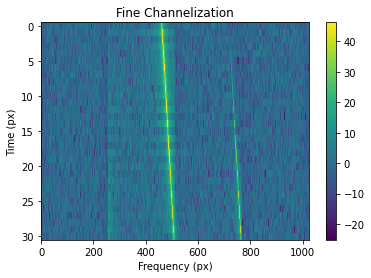

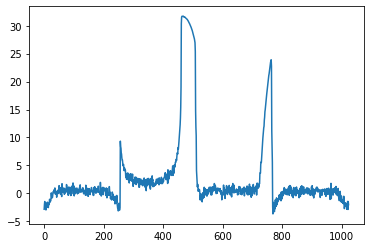

In [46]:
M     = 8        # Number of taps
P     = 1024       # Number of 'branches', also fft length
W     = 2000       # Number of windows of length M*P in input time stream
n_int = 2          # Number of time integrations on output data
sample_rate = 3e9

stream = stg.voltage.DataStream(sample_rate=3e9)
stream.add_noise(v_mean=0, 
                 v_std=1)
stream.add_signal(f_start=(sample_rate/P * (204.3))*u.Hz, 
                  drift_rate=50000000*u.Hz/u.s, 
                  level=1)
stream.get_samples(num_samples=M*P*W)

# digitize_stream = stg.voltage.sigproc.quantize_real(stream.v,
#                                                     target_fwhm=30,
#                                                     n_bits=8)

pfb_voltages = stg.voltage.sigproc.get_pfb_voltages(stream.v,
                                                    M,
                                                    P)

# Perform quantization
# n_bits = 8
# target_fwhm = 30 * 2**n_bits / 2**8 
# q_pfb_voltages = stg.voltage.sigproc.quantize_complex(pfb_voltages, 
#                                                       target_fwhm=target_fwhm,
#                                                       n_bits=n_bits)

# Here is where we would write to raw files!

XX_psd = stg.voltage.sigproc.get_pfb_waterfall(pfb_voltages=pfb_voltages,
                                               n_int=n_int,
                                               fftlength=256,
                                               start_channel=203,
                                               num_channels=4)
plt.imshow(db(XX_psd), 
           cmap='viridis', 
           aspect='auto', 
           interpolation='none')
plt.colorbar()
plt.xlabel("Frequency (px)")
plt.ylabel("Time (px)")
plt.title("Fine Channelization")
plt.show()

plt.plot(db(np.mean(XX_psd, axis=0)))
plt.show()

In [51]:
M     = 8        # Number of taps
P     = 8       # Number of 'branches', also fft length
W     = 2000       # Number of windows of length M*P in input time stream
n_int = 2          # Number of time integrations on output data
sample_rate = 3e9

stream = stg.voltage.DataStream(sample_rate=3e9)
stream.add_noise(v_mean=0, 
                 v_std=1)
stream.add_signal(f_start=(sample_rate/P * (204.3))*u.Hz, 
                  drift_rate=50000000*u.Hz/u.s, 
                  level=1)
stream.get_samples(num_samples=M*P*W)

pfb_voltages = stg.voltage.sigproc.get_pfb_voltages(stream.v,
                                                    M,
                                                    P)

# Here is where we would write to raw files!

# XX_psd = stg.voltage.sigproc.get_pfb_waterfall(pfb_voltages=pfb_voltages,
#                                                n_int=n_int,
#                                                fftlength=16,
#                                                start_channel=203,
#                                                num_channels=4)
# plt.imshow(db(XX_psd), 
#            cmap='viridis', 
#            aspect='auto', 
#            interpolation='none')
# plt.colorbar()
# plt.xlabel("Frequency (px)")
# plt.ylabel("Time (px)")
# plt.title("Fine Channelization")
# plt.show()

# plt.plot(db(np.mean(XX_psd, axis=0)))
# plt.show()

In [56]:
np.fft.rfft(stream.v, 8).shape

(5,)

In [57]:
np.fft.fft(stream.v, 8).shape

(8,)

In [59]:
np.fft.fft(stream.v, 8)

array([-0.79480922+0.j        ,  2.62054407+2.1318653j ,
        0.4407973 -0.21786546j, -3.75970811+3.06969666j,
        2.08243025+0.j        , -3.75970811-3.06969666j,
        0.4407973 +0.21786546j,  2.62054407-2.1318653j ])

In [66]:
np.fft.rfft(stream.v, 8)

array([-0.79480922+0.j        ,  2.62054407+2.1318653j ,
        0.4407973 -0.21786546j, -3.75970811+3.06969666j,
        2.08243025+0.j        ])

In [65]:
np.fft.fftfreq(8)

array([ 0.   ,  0.125,  0.25 ,  0.375, -0.5  , -0.375, -0.25 , -0.125])

In [54]:
pfb_voltages[:, 0]

array([-0.5952937 +0.j,  1.69832579+0.j, -1.03600738+0.j, ...,
       -1.6227395 +0.j,  0.64110044+0.j,  2.54028118+0.j])

In [12]:
vars(stream)

{'sample_rate': 3000000000.0,
 'dt': 3.333333333333333e-10,
 't_start': 0.0,
 'next_t_start': 0.005461333333333333,
 'noise_sources': [<function setigen.voltage.data_stream.DataStream.add_noise.<locals>.<lambda>(t)>],
 'signal_sources': [<function setigen.voltage.data_stream.DataStream.add_signal.<locals>.signal_func(t)>],
 't': array([0.00000000e+00, 3.33333333e-10, 6.66666667e-10, ...,
        5.46133233e-03, 5.46133267e-03, 5.46133300e-03]),
 'v': array([ 0.76727191,  1.54965671, -1.16607219, ...,  1.6872703 ,
        -0.51581466,  2.29337039])}

In [13]:
stream.get_samples(num_samples=M*P*W)
vars(stream)

{'sample_rate': 3000000000.0,
 'dt': 3.333333333333333e-10,
 't_start': 0.005461333333333333,
 'next_t_start': 0.010922666666666666,
 'noise_sources': [<function setigen.voltage.data_stream.DataStream.add_noise.<locals>.<lambda>(t)>],
 'signal_sources': [<function setigen.voltage.data_stream.DataStream.add_signal.<locals>.signal_func(t)>],
 't': array([0.00546133, 0.00546133, 0.00546133, ..., 0.01092267, 0.01092267,
        0.01092267]),
 'v': array([ 2.04992177, -1.0362833 , -1.11576676, ...,  0.59392818,
         1.29396728,  0.14599957])}

In [14]:
stream.get_samples(num_samples=5)
vars(stream)

{'sample_rate': 3000000000.0,
 'dt': 3.333333333333333e-10,
 't_start': 0.010922666666666666,
 'next_t_start': 0.010922668333333331,
 'noise_sources': [<function setigen.voltage.data_stream.DataStream.add_noise.<locals>.<lambda>(t)>],
 'signal_sources': [<function setigen.voltage.data_stream.DataStream.add_signal.<locals>.signal_func(t)>],
 't': array([0.01092267, 0.01092267, 0.01092267, 0.01092267, 0.01092267]),
 'v': array([ 1.14189773, -0.21277913, -0.74911943,  0.09908899,  0.90414015])}

In [15]:
stream.t

array([0.01092267, 0.01092267, 0.01092267, 0.01092267, 0.01092267])

In [18]:
1+stream.dt

1.0000000003333334

In [42]:
(np.linspace(0, 5 * stream.dt, 5) + stream.t_start)[0]

0.010922666666666666

In [43]:
(np.linspace(0, 5 * stream.dt, 5) + stream.t_start)[1]

0.010922667083333332

In [22]:
stream.t_start

0.010922666666666666

In [23]:
stream.t_start + stream.dt

0.010922666999999999

In [40]:
(np.linspace(0, 5, 5, endpoint=False) + stream.t_start * 3e9) / 3e9

array([0.01092267, 0.01092267, 0.01092267, 0.01092267, 0.01092267])

In [39]:
start = M*P*W
n = 50
np.linspace(start * stream.dt, (start + n) * stream.dt, n) * 3e9

array([16384000.        , 16384001.02040816, 16384002.04081632,
       16384003.06122449, 16384004.08163265, 16384005.10204081,
       16384006.12244898, 16384007.14285714, 16384008.1632653 ,
       16384009.18367347, 16384010.20408163, 16384011.2244898 ,
       16384012.24489796, 16384013.26530612, 16384014.28571428,
       16384015.30612245, 16384016.32653061, 16384017.34693877,
       16384018.36734694, 16384019.3877551 , 16384020.40816326,
       16384021.42857143, 16384022.44897959, 16384023.46938775,
       16384024.48979592, 16384025.51020408, 16384026.53061224,
       16384027.55102041, 16384028.57142857, 16384029.59183673,
       16384030.6122449 , 16384031.63265306, 16384032.65306122,
       16384033.67346939, 16384034.69387755, 16384035.71428571,
       16384036.73469388, 16384037.75510204, 16384038.7755102 ,
       16384039.79591837, 16384040.81632653, 16384041.83673469,
       16384042.85714286, 16384043.87755102, 16384044.89795918,
       16384045.91836734, 16384046.93877

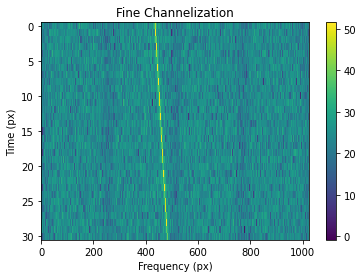

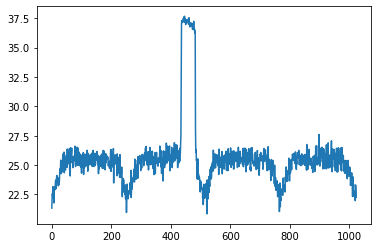

In [7]:
M     = 8        # Number of taps
P     = 1024       # Number of 'branches', also fft length
W     = 2000       # Number of windows of length M*P in input time stream
n_int = 2          # Number of time integrations on output data
sample_rate = 3e9

stream = stg.voltage.DataStream(sample_rate=3e9)
stream.add_noise(v_mean=0, 
                 v_std=1)
stream.add_signal(f_start=(sample_rate/P * (204.2))*u.Hz, 
                  drift_rate=50000000*u.Hz/u.s, 
                  level=0.1)
stream.get_samples(num_samples=M*P*W)

digitize_stream = stg.voltage.sigproc.quantize_real(stream.v,
                                                    target_fwhm=30,
                                                    n_bits=8)

pfb_voltages = stg.voltage.sigproc.get_pfb_voltages(digitize_stream,
                                                    M,
                                                    P)

# Perform quantization
n_bits = 8
target_fwhm = 30 * 2**n_bits / 2**8 
q_pfb_voltages = stg.voltage.sigproc.quantize_complex(pfb_voltages, 
                                                      target_fwhm=target_fwhm,
                                                      n_bits=n_bits)

# Here is where we would write to raw files!

XX_psd = stg.voltage.sigproc.get_pfb_waterfall(pfb_voltages=q_pfb_voltages,
                                               n_int=n_int,
                                               fftlength=256,
                                               start_channel=203,
                                               num_channels=4)
plt.imshow(db(XX_psd), 
           cmap='viridis', 
           aspect='auto', 
           interpolation='none')
plt.colorbar()
plt.xlabel("Frequency (px)")
plt.ylabel("Time (px)")
plt.title("Fine Channelization")
plt.show()

plt.plot(db(np.mean(XX_psd, axis=0)))
plt.show()

In [8]:
q_pfb_voltages.shape

(15993, 513)

In [14]:
q_pfb_voltages[:, 1:65].shape

(15993, 64)

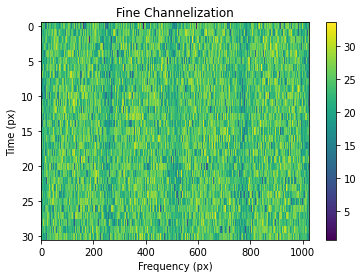

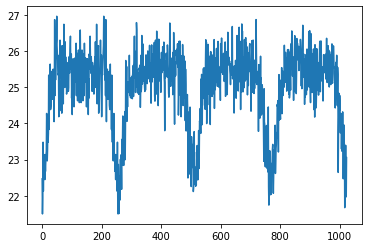

In [9]:
XX_psd = stg.voltage.sigproc.get_pfb_waterfall(pfb_voltages=q_pfb_voltages,
                                               n_int=n_int,
                                               fftlength=256,
                                               start_channel=0,
                                               num_channels=4)
plt.imshow(db(XX_psd), 
           cmap='viridis', 
           aspect='auto', 
           interpolation='none')
plt.colorbar()
plt.xlabel("Frequency (px)")
plt.ylabel("Time (px)")
plt.title("Fine Channelization")
plt.show()

plt.plot(db(np.mean(XX_psd, axis=0)))
plt.show()

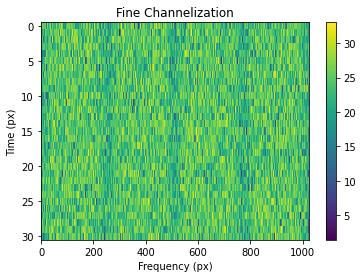

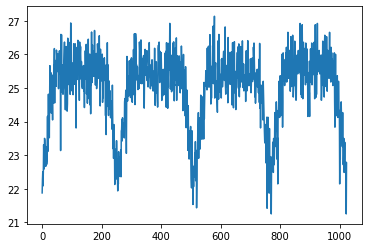

In [13]:
XX_psd = stg.voltage.sigproc.get_pfb_waterfall(pfb_voltages=q_pfb_voltages,
                                               n_int=n_int,
                                               fftlength=256,
                                               start_channel=513-4,
                                               num_channels=4)
plt.imshow(db(XX_psd), 
           cmap='viridis', 
           aspect='auto', 
           interpolation='none')
plt.colorbar()
plt.xlabel("Frequency (px)")
plt.ylabel("Time (px)")
plt.title("Fine Channelization")
plt.show()

plt.plot(db(np.mean(XX_psd, axis=0)))
plt.show()

In [16]:
bytes(np.array([1,2,3]))

b'\x01\x00\x00\x00\x00\x00\x00\x00\x02\x00\x00\x00\x00\x00\x00\x00\x03\x00\x00\x00\x00\x00\x00\x00'

In [25]:
import struct
struct.pack("=b", 0)

b'\x00'

In [41]:
[struct.pack("=b", x) for x in np.array([1,2,-128])]

[b'\x01', b'\x02', b'\x80']

In [44]:
np.array([1,2,-128], dtype=np.int8).tobytes()

b'\x01\x02\x80'

In [53]:
np.repeat(np.arange(5)[np.newaxis, :], 3, axis=0)

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [106]:
np.outer(np.arange(204, 204+4), np.arange(10))

array([[   0,  204,  408,  612,  816, 1020, 1224, 1428, 1632, 1836],
       [   0,  205,  410,  615,  820, 1025, 1230, 1435, 1640, 1845],
       [   0,  206,  412,  618,  824, 1030, 1236, 1442, 1648, 1854],
       [   0,  207,  414,  621,  828, 1035, 1242, 1449, 1656, 1863]])

In [72]:
np.arange(12).reshape((3,4))

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [95]:
np.arange(12).reshape((3,4, 1))

array([[[ 0],
        [ 1],
        [ 2],
        [ 3]],

       [[ 4],
        [ 5],
        [ 6],
        [ 7]],

       [[ 8],
        [ 9],
        [10],
        [11]]])

In [98]:
np.concatenate(np.arange(12).reshape((3,4, 1)), axis=1)

array([[ 0,  4,  8],
       [ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11]])

In [81]:
np.tile(np.arange(12).reshape((3,4)), 3,)

array([[ 0,  1,  2,  3,  0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11,  8,  9, 10, 11]])

In [76]:
np.repeat(np.arange(12).reshape((3,4)), 3, axis=1)

array([[ 0,  0,  0,  1,  1,  1,  2,  2,  2,  3,  3,  3],
       [ 4,  4,  4,  5,  5,  5,  6,  6,  6,  7,  7,  7],
       [ 8,  8,  8,  9,  9,  9, 10, 10, 10, 11, 11, 11]])

(15992, 4)


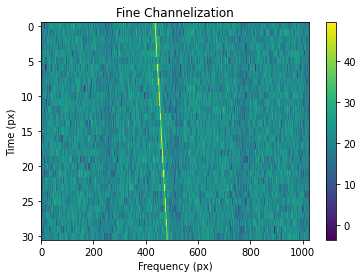

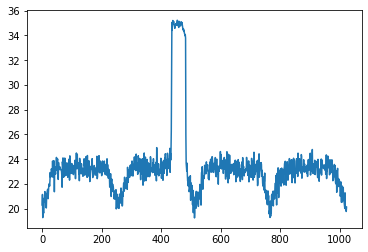

11.729685306549072

In [110]:
start = time.time()

def get_pfb_voltages(x, n_taps, n_chan, start_channel, num_channels, window_fn='hamming'):
    """
    Produce complex raw voltage data as a function of time and coarse channel.
    """
    # Generate window coefficients
    win_coeffs = stg.voltage.get_pfb_window(n_taps, n_chan, window_fn)
#     win_coeffs /= np.max(win_coeffs)
    # Apply frontend, take FFT, then take power (i.e. square)
    x_fir = stg.voltage.pfb_frontend(x, win_coeffs, n_taps, n_chan)
    
    x_fir_tiled = np.tile(x_fir, num_channels)
    fft_coeffs = np.outer(np.arange(start_channel, start_channel + num_channels),
                          np.arange(n_chan)).flatten()
    fft_coeffs = np.exp(-2*np.pi*1j/P*np.repeat(fft_coeffs[np.newaxis, :], x_fir.shape[0], axis=0))
    x_pfb = x_fir_tiled * fft_coeffs
    x_pfb = x_pfb.reshape(x_fir.shape[0], num_channels, n_chan)
    x_pfb = np.transpose(x_pfb, (1, 0, 2))
    x_pfb = np.sum(x_pfb, axis=2, keepdims=True)
    x_pfb = np.concatenate(x_pfb, axis=1)
    
#     w = np.exp(-2*np.pi*1j*(1/P * (204))*np.repeat(np.arange(P)[np.newaxis, :], x_fir.shape[0], axis=0))
#     x_pfb = np.sum(x_fir * w, axis=1, keepdims=True)
    
#     x_pfb = np.fft.rfft(x_fir, n_chan, axis=1) / n_chan**0.5
    return x_pfb

M     = 8        # Number of taps
P     = 1024       # Number of 'branches', also fft length
W     = 2000       # Number of windows of length M*P in input time stream
n_int = 2          # Number of time integrations on output data
sample_rate = 3e9

stream = stg.voltage.DataStream(sample_rate=3e9)
stream.add_noise(v_mean=0, 
                 v_std=1)
stream.add_signal(f_start=(sample_rate/P * (204.2))*u.Hz, 
                  drift_rate=50000000*u.Hz/u.s, 
                  level=0.1)
stream.get_samples(num_samples=M*P*W)

digitize_stream = stg.voltage.quantize_real(stream.v,
                                                    target_fwhm=30,
                                                    n_bits=8)

pfb_voltages = get_pfb_voltages(digitize_stream, M, P, 203, 4)
print(pfb_voltages.shape)

# Perform quantization
n_bits = 8
target_fwhm = 30 * 2**n_bits / 2**8 
q_pfb_voltages = stg.voltage.quantize_complex(pfb_voltages, 
                                                      target_fwhm=target_fwhm,
                                                      n_bits=n_bits)

# # Here is where we would write to raw files!

XX_psd = stg.voltage.get_pfb_waterfall(pfb_voltages=q_pfb_voltages,
                                               n_int=n_int,
                                               fftlength=256,
                                               start_channel=0,
                                               num_channels=4)
plt.imshow(db(XX_psd), 
           cmap='viridis', 
           aspect='auto', 
           interpolation='none')
plt.colorbar()
plt.xlabel("Frequency (px)")
plt.ylabel("Time (px)")
plt.title("Fine Channelization")
plt.show()

plt.plot(db(np.mean(XX_psd, axis=0)))
plt.show()

time.time() - start

(15992, 513)


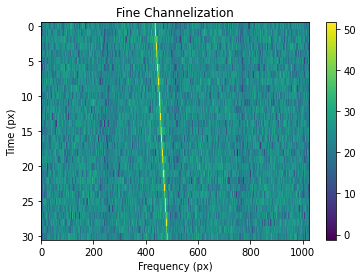

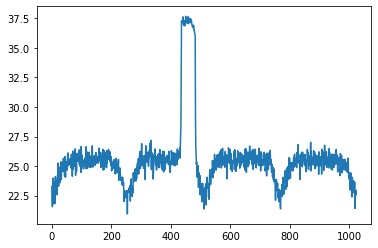

4.604636907577515

In [109]:
start = time.time()

M     = 8        # Number of taps
P     = 1024       # Number of 'branches', also fft length
W     = 2000       # Number of windows of length M*P in input time stream
n_int = 2          # Number of time integrations on output data
sample_rate = 3e9

stream = stg.voltage.DataStream(sample_rate=3e9)
stream.add_noise(v_mean=0, 
                 v_std=1)
stream.add_signal(f_start=(sample_rate/P * (204.2))*u.Hz, 
                  drift_rate=50000000*u.Hz/u.s, 
                  level=0.1)
stream.get_samples(num_samples=M*P*W)

digitize_stream = stg.voltage.quantize_real(stream.v,
                                                    target_fwhm=30,
                                                    n_bits=8)

pfb_voltages = stg.voltage.get_pfb_voltages(digitize_stream, M, P)
print(pfb_voltages.shape)

# Perform quantization
n_bits = 8
target_fwhm = 30 * 2**n_bits / 2**8 
q_pfb_voltages = stg.voltage.quantize_complex(pfb_voltages, 
                                                      target_fwhm=target_fwhm,
                                                      n_bits=n_bits)

# # Here is where we would write to raw files!

XX_psd = stg.voltage.get_pfb_waterfall(pfb_voltages=q_pfb_voltages,
                                               n_int=n_int,
                                               fftlength=256,
                                               start_channel=203,
                                               num_channels=4)
plt.imshow(db(XX_psd), 
           cmap='viridis', 
           aspect='auto', 
           interpolation='none')
plt.colorbar()
plt.xlabel("Frequency (px)")
plt.ylabel("Time (px)")
plt.title("Fine Channelization")
plt.show()

plt.plot(db(np.mean(XX_psd, axis=0)))
plt.show()

time.time() - start

(15992, 4)


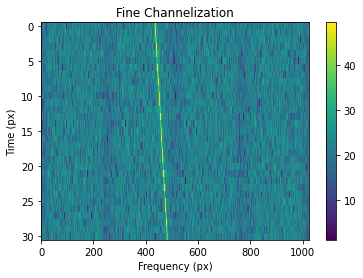

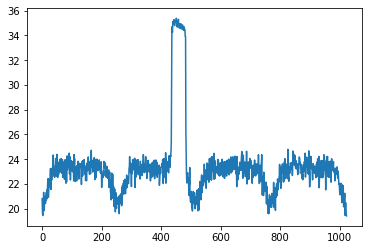

10.57773232460022

In [112]:
start = time.time()

def get_pfb_voltages(x, n_taps, n_chan, start_channel, num_channels, window_fn='hamming'):
    """
    Produce complex raw voltage data as a function of time and coarse channel.
    """
    # Generate window coefficients
    win_coeffs = stg.voltage.get_pfb_window(n_taps, n_chan, window_fn)
#     win_coeffs /= np.max(win_coeffs)
    # Apply frontend, take FFT, then take power (i.e. square)
    x_fir = stg.voltage.pfb_frontend(x, win_coeffs, n_taps, n_chan)
    
    pfb_comp = []
    for i in range(num_channels):
        w = np.exp(-2*np.pi*1j*(1/P * (start_channel + i))*np.repeat(np.arange(P)[np.newaxis, :], x_fir.shape[0], axis=0))
        x_pfb = np.sum(x_fir * w, axis=1, keepdims=True)
        pfb_comp.append(x_pfb)
    
    return np.concatenate(pfb_comp, axis=1)
    

M     = 8        # Number of taps
P     = 1024       # Number of 'branches', also fft length
W     = 2000       # Number of windows of length M*P in input time stream
n_int = 2          # Number of time integrations on output data
sample_rate = 3e9

stream = stg.voltage.DataStream(sample_rate=3e9)
stream.add_noise(v_mean=0, 
                 v_std=1)
stream.add_signal(f_start=(sample_rate/P * (204.2))*u.Hz, 
                  drift_rate=50000000*u.Hz/u.s, 
                  level=0.1)
stream.get_samples(num_samples=M*P*W)

digitize_stream = stg.voltage.quantize_real(stream.v,
                                                    target_fwhm=30,
                                                    n_bits=8)

pfb_voltages = get_pfb_voltages(digitize_stream, M, P, 203, 4)
print(pfb_voltages.shape)

# Perform quantization
n_bits = 8
target_fwhm = 30 * 2**n_bits / 2**8 
q_pfb_voltages = stg.voltage.quantize_complex(pfb_voltages, 
                                                      target_fwhm=target_fwhm,
                                                      n_bits=n_bits)

# # Here is where we would write to raw files!

XX_psd = stg.voltage.get_pfb_waterfall(pfb_voltages=q_pfb_voltages,
                                               n_int=n_int,
                                               fftlength=256,
                                               start_channel=0,
                                               num_channels=4)
plt.imshow(db(XX_psd), 
           cmap='viridis', 
           aspect='auto', 
           interpolation='none')
plt.colorbar()
plt.xlabel("Frequency (px)")
plt.ylabel("Time (px)")
plt.title("Fine Channelization")
plt.show()

plt.plot(db(np.mean(XX_psd, axis=0)))
plt.show()

time.time() - start

13.165868997573853
2.5030934810638428
pfb 4.174108982086182
rfft 1.220935344696045
(131072, 513)
5.450751543045044
3.273496627807617
0.025923490524291992


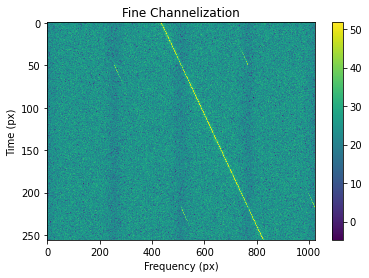

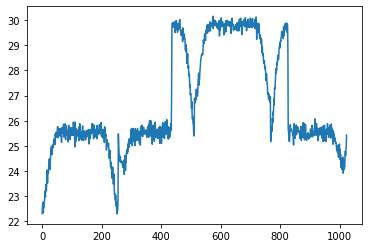

0.3859741687774658

In [5]:
def get_pfb_voltages(x, n_taps, n_chan, window_fn='hamming'):
    """
    Produce complex raw voltage data as a function of time and coarse channel.
    """
    # Generate window coefficients
    win_coeffs = stg.voltage.get_pfb_window(n_taps, n_chan, window_fn)
#     win_coeffs /= np.max(win_coeffs)
    # Apply frontend, take FFT, then take power (i.e. square)
    start1 = time.time()
    x_fir = stg.voltage.pfb_frontend(x, win_coeffs, n_taps, n_chan)
    print('pfb', time.time() - start1)
    start1 = time.time()
    x_pfb = np.fft.rfft(x_fir, n_chan, axis=1) / n_chan**0.5
    print('rfft', time.time() - start1)
    return x_pfb

start = time.time()

M     = 8        # Number of taps
P     = 1024       # Number of 'branches', also fft length
W     = 2**14 + 1       # Number of windows of length M*P in input time stream
n_int = 2          # Number of time integrations on output data
sample_rate = 3e9

stream = stg.voltage.DataStream(sample_rate=3e9)
stream.add_noise(v_mean=0, 
                 v_std=1)
stream.add_signal(f_start=(sample_rate/P * (204.2))*u.Hz, 
                  drift_rate=50000000*u.Hz/u.s, 
                  level=0.1)
stream.get_samples(num_samples=M*P*W)

print(time.time() - start)
start = time.time()

digitize_stream = stg.voltage.quantize_real(stream.v,
                                                    target_fwhm=30,
                                                    n_bits=8)

print(time.time() - start)
start = time.time()

pfb_voltages = get_pfb_voltages(digitize_stream, M, P)
print(pfb_voltages.shape)

print(time.time() - start)
start = time.time()

# Perform quantization
n_bits = 8
target_fwhm = 30 * 2**n_bits / 2**8 
q_pfb_voltages = stg.voltage.quantize_complex(pfb_voltages, 
                                                      target_fwhm=target_fwhm,
                                                      n_bits=n_bits)

print(time.time() - start)
start = time.time()

# # Here is where we would write to raw files!

XX_psd = stg.voltage.get_pfb_waterfall(pfb_voltages=q_pfb_voltages,
                                               n_int=n_int,
                                               fftlength=256,
                                               start_channel=203,
                                               num_channels=4)

print(time.time() - start)
start = time.time()


plt.imshow(db(XX_psd), 
           cmap='viridis', 
           aspect='auto', 
           interpolation='none')
plt.colorbar()
plt.xlabel("Frequency (px)")
plt.ylabel("Time (px)")
plt.title("Fine Channelization")
plt.show()

plt.plot(db(np.mean(XX_psd, axis=0)))
plt.show()

time.time() - start

(131072, 4)


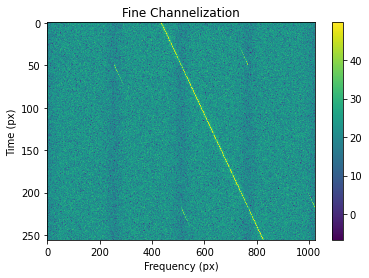

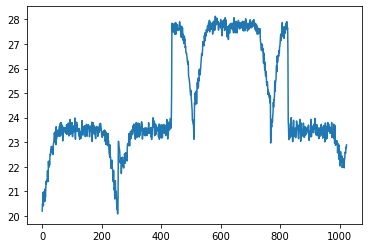

152.22108054161072

In [114]:
start = time.time()

def get_pfb_voltages(x, n_taps, n_chan, start_channel, num_channels, window_fn='hamming'):
    """
    Produce complex raw voltage data as a function of time and coarse channel.
    """
    # Generate window coefficients
    win_coeffs = stg.voltage.get_pfb_window(n_taps, n_chan, window_fn)
#     win_coeffs /= np.max(win_coeffs)
    # Apply frontend, take FFT, then take power (i.e. square)
    x_fir = stg.voltage.pfb_frontend(x, win_coeffs, n_taps, n_chan)
    
    x_fir_tiled = np.tile(x_fir, num_channels)
    fft_coeffs = np.outer(np.arange(start_channel, start_channel + num_channels),
                          np.arange(n_chan)).flatten()
    fft_coeffs = np.exp(-2*np.pi*1j/P*np.repeat(fft_coeffs[np.newaxis, :], x_fir.shape[0], axis=0))
    x_pfb = x_fir_tiled * fft_coeffs
    x_pfb = x_pfb.reshape(x_fir.shape[0], num_channels, n_chan)
    x_pfb = np.transpose(x_pfb, (1, 0, 2))
    x_pfb = np.sum(x_pfb, axis=2, keepdims=True)
    x_pfb = np.concatenate(x_pfb, axis=1)
    
#     w = np.exp(-2*np.pi*1j*(1/P * (204))*np.repeat(np.arange(P)[np.newaxis, :], x_fir.shape[0], axis=0))
#     x_pfb = np.sum(x_fir * w, axis=1, keepdims=True)
    
#     x_pfb = np.fft.rfft(x_fir, n_chan, axis=1) / n_chan**0.5
    return x_pfb

M     = 8        # Number of taps
P     = 1024       # Number of 'branches', also fft length
W     = 2**14 + 1       # Number of windows of length M*P in input time stream
n_int = 2          # Number of time integrations on output data
sample_rate = 3e9

stream = stg.voltage.DataStream(sample_rate=3e9)
stream.add_noise(v_mean=0, 
                 v_std=1)
stream.add_signal(f_start=(sample_rate/P * (204.2))*u.Hz, 
                  drift_rate=50000000*u.Hz/u.s, 
                  level=0.1)
stream.get_samples(num_samples=M*P*W)

digitize_stream = stg.voltage.quantize_real(stream.v,
                                                    target_fwhm=30,
                                                    n_bits=8)

pfb_voltages = get_pfb_voltages(digitize_stream, M, P, 203, 4)
print(pfb_voltages.shape)

# Perform quantization
n_bits = 8
target_fwhm = 30 * 2**n_bits / 2**8 
q_pfb_voltages = stg.voltage.quantize_complex(pfb_voltages, 
                                                      target_fwhm=target_fwhm,
                                                      n_bits=n_bits)

# # Here is where we would write to raw files!

XX_psd = stg.voltage.get_pfb_waterfall(pfb_voltages=q_pfb_voltages,
                                               n_int=n_int,
                                               fftlength=256,
                                               start_channel=0,
                                               num_channels=4)
plt.imshow(db(XX_psd), 
           cmap='viridis', 
           aspect='auto', 
           interpolation='none')
plt.colorbar()
plt.xlabel("Frequency (px)")
plt.ylabel("Time (px)")
plt.title("Fine Channelization")
plt.show()

plt.plot(db(np.mean(XX_psd, axis=0)))
plt.show()

time.time() - start

(131072, 4)


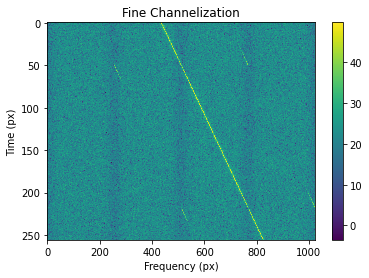

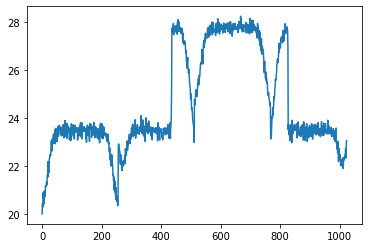

86.02184224128723

In [115]:
start = time.time()

def get_pfb_voltages(x, n_taps, n_chan, start_channel, num_channels, window_fn='hamming'):
    """
    Produce complex raw voltage data as a function of time and coarse channel.
    """
    # Generate window coefficients
    win_coeffs = stg.voltage.get_pfb_window(n_taps, n_chan, window_fn)
#     win_coeffs /= np.max(win_coeffs)
    # Apply frontend, take FFT, then take power (i.e. square)
    x_fir = stg.voltage.pfb_frontend(x, win_coeffs, n_taps, n_chan)
    
    pfb_comp = []
    for i in range(num_channels):
        w = np.exp(-2*np.pi*1j*(1/P * (start_channel + i))*np.repeat(np.arange(P)[np.newaxis, :], x_fir.shape[0], axis=0))
        x_pfb = np.sum(x_fir * w, axis=1, keepdims=True)
        pfb_comp.append(x_pfb)
    
    return np.concatenate(pfb_comp, axis=1)
    

M     = 8        # Number of taps
P     = 1024       # Number of 'branches', also fft length
W     = 2**14 + 1       # Number of windows of length M*P in input time stream
n_int = 2          # Number of time integrations on output data
sample_rate = 3e9

stream = stg.voltage.DataStream(sample_rate=3e9)
stream.add_noise(v_mean=0, 
                 v_std=1)
stream.add_signal(f_start=(sample_rate/P * (204.2))*u.Hz, 
                  drift_rate=50000000*u.Hz/u.s, 
                  level=0.1)
stream.get_samples(num_samples=M*P*W)

digitize_stream = stg.voltage.quantize_real(stream.v,
                                                    target_fwhm=30,
                                                    n_bits=8)

pfb_voltages = get_pfb_voltages(digitize_stream, M, P, 203, 4)
print(pfb_voltages.shape)

# Perform quantization
n_bits = 8
target_fwhm = 30 * 2**n_bits / 2**8 
q_pfb_voltages = stg.voltage.quantize_complex(pfb_voltages, 
                                                      target_fwhm=target_fwhm,
                                                      n_bits=n_bits)

# # Here is where we would write to raw files!

XX_psd = stg.voltage.get_pfb_waterfall(pfb_voltages=q_pfb_voltages,
                                               n_int=n_int,
                                               fftlength=256,
                                               start_channel=0,
                                               num_channels=4)
plt.imshow(db(XX_psd), 
           cmap='viridis', 
           aspect='auto', 
           interpolation='none')
plt.colorbar()
plt.xlabel("Frequency (px)")
plt.ylabel("Time (px)")
plt.title("Fine Channelization")
plt.show()

plt.plot(db(np.mean(XX_psd, axis=0)))
plt.show()

time.time() - start

(131072, 4)


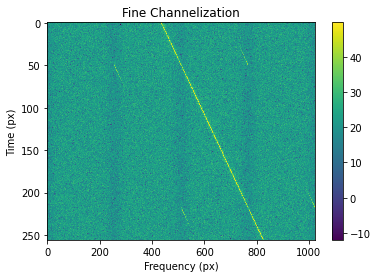

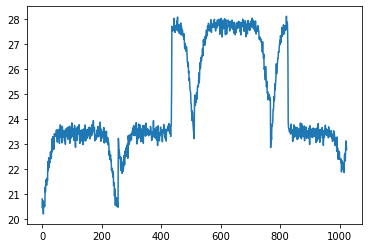

83.9629602432251

In [121]:
start = time.time()

def get_pfb_voltages(x, n_taps, n_chan, start_channel, num_channels, window_fn='hamming'):
    """
    Produce complex raw voltage data as a function of time and coarse channel.
    """
    # Generate window coefficients
    win_coeffs = stg.voltage.get_pfb_window(n_taps, n_chan, window_fn)
#     win_coeffs /= np.max(win_coeffs)
    # Apply frontend, take FFT, then take power (i.e. square)
    x_fir = stg.voltage.pfb_frontend(x, win_coeffs, n_taps, n_chan)
    
    pfb_comp = []
    for i in range(x_fir.shape[0]):
        pfb_comp.append([])
        for j in range(num_channels):
            w = np.exp(-2*np.pi*1j*(1/P * (start_channel + j))*np.arange(P))
            x = np.sum(x_fir[i, :] * w)
            pfb_comp[-1].append(x)
        pfb_comp[-1] = np.array(pfb_comp[-1]).reshape((1, num_channels))
    
    return np.concatenate(pfb_comp, axis=0)
    

M     = 8        # Number of taps
P     = 1024       # Number of 'branches', also fft length
W     = 2**14 + 1       # Number of windows of length M*P in input time stream
n_int = 2          # Number of time integrations on output data
sample_rate = 3e9

stream = stg.voltage.DataStream(sample_rate=3e9)
stream.add_noise(v_mean=0, 
                 v_std=1)
stream.add_signal(f_start=(sample_rate/P * (204.2))*u.Hz, 
                  drift_rate=50000000*u.Hz/u.s, 
                  level=0.1)
stream.get_samples(num_samples=M*P*W)

digitize_stream = stg.voltage.quantize_real(stream.v,
                                                    target_fwhm=30,
                                                    n_bits=8)

pfb_voltages = get_pfb_voltages(digitize_stream, M, P, 203, 4)
print(pfb_voltages.shape)

# Perform quantization
n_bits = 8
target_fwhm = 30 * 2**n_bits / 2**8 
q_pfb_voltages = stg.voltage.quantize_complex(pfb_voltages, 
                                                      target_fwhm=target_fwhm,
                                                      n_bits=n_bits)

# # Here is where we would write to raw files!

XX_psd = stg.voltage.get_pfb_waterfall(pfb_voltages=q_pfb_voltages,
                                               n_int=n_int,
                                               fftlength=256,
                                               start_channel=0,
                                               num_channels=4)
plt.imshow(db(XX_psd), 
           cmap='viridis', 
           aspect='auto', 
           interpolation='none')
plt.colorbar()
plt.xlabel("Frequency (px)")
plt.ylabel("Time (px)")
plt.title("Fine Channelization")
plt.show()

plt.plot(db(np.mean(XX_psd, axis=0)))
plt.show()

time.time() - start

In [ ]:
M*(W-1) is the number of time samples in the raw voltage file

In [4]:
start = time.time()

M     = 8        # Number of taps
P     = 1024       # Number of 'branches', also fft length
W     = 2**14 + 1       # Number of windows of length M*P in input time stream
n_int = 2          # Number of time integrations on output data
sample_rate = 3e9

stream = stg.voltage.DataStream(sample_rate=3e9)
stream.add_noise(v_mean=0, 
                 v_std=1)
stream.add_signal(f_start=(sample_rate/P * (204.2))*u.Hz, 
                  drift_rate=50000000*u.Hz/u.s, 
                  level=0.1)

for block in num_blocks:
    stream.get_samples(num_samples=M*P*W)

    digitize_stream = stg.voltage.quantize_real(stream.v,
                                                target_fwhm=30,
                                                n_bits=8)

    pfb_voltages = stg.voltage.get_pfb_voltages(digitize_stream, M, P)

    # Perform quantization
    n_bits = 8
    target_fwhm = 30 * 2**n_bits / 2**8 
    q_pfb_voltages = stg.voltage.quantize_complex(pfb_voltages, 
                                                  target_fwhm=target_fwhm,
                                                  n_bits=n_bits)

    # # Here is where we would write to raw files!


KeyboardInterrupt: 

In [ ]:
rvp = stg.voltage.RawVoltagePipeline(M, P, sample_rate, )

In [ ]:
start = time.time()

M     = 8        # Number of taps
P     = 1024       # Number of 'branches', also fft length
W     = 2**14 + 1       # Number of windows of length M*P in input time stream
sample_rate = 3e9

stream = stg.voltage.VoltageStream(sample_rate=3e9)
stream.add_noise(v_mean=0, 
                 v_std=1)
stream.add_signal(f_start=(sample_rate/P * (204.2))*u.Hz, 
                  drift_rate=50000000*u.Hz/u.s, 
                  level=0.1)





digitizer = stg.voltage.RealQuantizer(target_fwhm=30, n_bits=8)
filterbank = stg.voltage.PolyphaseFilterbank(n_taps=M, n_chans=P)
requantizer = stg.voltage.ComplexQuantizer(target_fwhm=30, n_bits=8)
recorder = stg.voltage.DataRecorder(n_bits=8, n_pols=2, )

x = stream.get_samples(num_sample=M*P*W)
x = digitizer.quantize(x)
x = pfb.channelize(x)
x = requantizer.quantize(x)
recorder.record(x, 'test.raw')

n_pols = 2
num_blocks=128
header = ?
blocksize = 134217728
W = blocksize // (P / 8 * 2 * n_pols) + 1 

for block in num_blocks:
    v = stream.get_samples(num_samples=M*P*W)

    digitize_stream = stg.voltage.quantize_real(v,
                                                target_fwhm=30,
                                                n_bits=8)

    pfb_voltages = stg.voltage.get_pfb_voltages(digitize_stream, M, P)

    # Perform quantization
    n_bits = 8
    target_fwhm = 30 * 2**n_bits / 2**8 
    q_pfb_voltages = stg.voltage.quantize_complex(pfb_voltages, 
                                                  target_fwhm=target_fwhm,
                                                  n_bits=n_bits)

    # # Here is where we would write to raw files!


In [11]:
start = time.time()

M     = 8        # Number of taps
P     = 1024       # Number of 'branches', also fft length
W     = 2**14 + 1       # Number of windows of length M*P in input time stream
sample_rate = 3e9

# Create data streams
stream_x = stg.voltage.VoltageStream(sample_rate=3e9)
stream_x.add_noise(v_mean=0, 
                   v_std=1)
stream_x.add_signal(f_start=(sample_rate/P * (204.2))*u.Hz, 
                    drift_rate=5000000*u.Hz/u.s, 
                    level=0.1)

stream_y = stg.voltage.VoltageStream(sample_rate=3e9)
stream_y.add_noise(v_mean=0, 
                   v_std=1)
stream_y.add_signal(f_start=(sample_rate/P * (204.2))*u.Hz, 
                    drift_rate=5000000*u.Hz/u.s, 
                    level=0.1)

# Initialize pipelien components
digitizer = stg.voltage.RealQuantizer(target_fwhm=30, n_bits=8)
filterbank = stg.voltage.PolyphaseFilterbank(n_taps=M, n_chans=P)
requantizer = stg.voltage.ComplexQuantizer(target_fwhm=30, n_bits=8)
recorder = stg.voltage.DataRecorder(n_bits=8, n_pols=2, )


n_pols = 2
num_blocks=128
header = ?
block_size = 134217728
W = block_size // (P / 8 * 2 * n_pols) + 1 

for block in num_blocks:
    final_voltages = np.empty((P // 2 + 1, 4 * M * (W - 1)))
    for pol, stream in enumerate([stream_x, stream_y]):
        v = stream.get_samples(num_samples=M*P*W)
        qv = digitizer.quantize(v)
        cv = pfb.channelize(qv)
        qcv = requantizer.quantize(cv)
    final_voltages[:, 2*pol::4] = np.real(qcv).T
    final_voltages[:, 2*pol+1::4] = np.imag(qcv).T
    
    # Select only a few channels to save, for space, I guess...
    final_voltages = final_voltages[:, :]
    recorder.record(final_voltages, 'test.raw')

    # # Here is where we would write to raw files!


524288.0

In [ ]:
rvp = stg.voltage.RawVoltagePipeline(M=8,
                                     P=1024,
                                     sample_rate=3e9, 
                                     stream_x=None,
                                     stream_y=None)

In [ ]:
rvp.generate_raw(obs_length=300)

In [26]:
(134217728*128/4/64/8 + 1) * 8 * 1024 / 3e9

22.906494976

In [27]:
(300 * 3e9 / 8 / 1024 - 1) * 8 * 4 * 64 / 134217728

1676.3806190490723

In [35]:
class RawVoltagePipeline(stream_x,
                         stream_y=None,
                         )

'0004'

In [ ]:
n_taps = 8
n_branches = 1024 # Results in 512 coarse channels after real FFT
sample_rate = 3e9


obs_length = 300.
block_size = 134217728 # In bytes
blocks_per_file = 128

n_chans = 64 # Somewhere in the code, we need to manually truncate to isolate n_chans coarse channels
start_chan = 0

raw_file_stem = 'test'

digitizer = stg.voltage.RealQuantizer(target_fwhm=32, n_bits=8)
filterbank = stg.voltage.PolyphaseFilterbank(n_taps=n_taps, n_branches=n_branches)
requantizer = stg.voltage.ComplexQuantizer(target_fwhm=32, n_bits=8)
recorder = stg.voltage.DataRecorder(n_bits=8, n_pols=2)

rvp = stg.voltage.RawVoltagePipeline(stream_x=stream_x,
                                     stream_y=stream_y,
                                     block_size=block_size,
                                     blocks_per_file=blocks_per_file,
                                     digitizer=digitizer,
                                     filterbank=filterbank,
                                     requantizer=requantizer,
                                     recorder=recorder)
rvp.observe(obs_length=300, num_blocks=None)
######################
num_blocks = (obs_length * sample_rate / n_taps / n_branches - 1) * n_taps * 4 * n_chans / block_size
num_files = int(np.ceil(num_blocks / blocks_per_file))

if stream_y is not None:
    n_pols = 2
    streams = [rvp.stream_x, rvp.stream_y]
else:
    n_pols = 1
    streams = [rvp.stream_x]
    
for i in range(num_files):
    save_fn = f'{raw_file_stem}.{i:04}.raw'
    with open(save_fn, 'wb') as f:
        # If blocks won't fill a whole file, adjust number of blocks to write at the end
        if i == num_files - 1 and num_blocks % blocks_per_file != 0:
            blocks_to_write = num_blocks % blocks_per_file:
        else:
            blocks_to_write = blocks_per_file

        W = int(block_size / 2 / n_pols / n_taps / n_branches * 2) + 1
        for j in range(blocks_to_write):
            final_voltages = np.empty((n_branches // 2 +1, 2 * n_pols * n_taps * (W - 1)))
            
            for pol, stream in enumerate(streams):
                if stream.next_t_start == 0:
                    num_samples = n_branches * n_taps * W
                else:
                    num_samples = n_branches * n_taps * (W - 1)
                    
                v = stream.get_samples(num_samples=num_samples)
                qv = digitizer.quantize(v)
                cv = pfb.channelize(qv)
                qcv = requantizer.quantize(cv)
                
                final_voltages[:, 2*pol::2*n_pols] = np.real(qcv).T
                final_voltages[:, 2*pol+1::2*n_pols] = np.imag(qcv).T

            # Select only a few channels to save, for space, I guess...
            final_voltages = final_voltages[(start_chan + 1):(start_chan + n_chans + 1), :]
            recorder.record(final_voltages, f)





In [ ]:
class PolyphaseFilterbank(object):
    def __init__(self, n_taps=8, n_branches=1024):
        self.n_taps = n_taps
        self.n_branches = n_branches
        self.cache = None
        
        self._get_pfb_window()
        
    def _get_pfb_window(self):
        self.window = stg.voltage.sigproc.pfb_window(self.n_taps, self.n_branches)
        
    def _pfb_frontend(self, x):
        """
        Apply windowing function to create polyphase filterbank frontend.
        """
        # Cache last section of data, which is excluded in PFB step
        if self.cache is not None:
            x = np.concatenate([self.cache, x])
        self.cache = x[-self.n_taps*self.n_branches:]
        
        return stg.voltage.sigproc.pfb_frontend(x, self.window, self.n_taps, self.n_branches)
        
    def channelize(self, x):
        x_pfb = np.fft.rfft(self._pfb_frontend(x), self.n_branches, axis=1) / self.n_branches**0.5
        return x_pfb
    

class RealQuantizer(object):
    def __init__(self, target_fwhm=30, n_bits=8):
        self.target_fwhm = target_fwhm
        self.n_bits = n_bits
        
    def quantize(self, voltages):
        return stg.voltage.quantize_real(voltages,
                                         target_fwhm=30,
                                         n_bits=8)
    
    
class ComplexQuantizer(object):
    def __init__(self, target_fwhm=30, n_bits=8):
        self.target_fwhm = target_fwhm
        self.n_bits = n_bits
        
    def quantize(self, voltages):
        return stg.voltage.quantize_complex(voltages,
                                            target_fwhm=30,
                                            n_bits=8)

In [28]:
1676.3806190490723 / 128

13.096723586320877

In [29]:
1676.3806190490723 - 128 * 13

12.380619049072266

In [30]:
0.380619049072266*(134217728/4/64/8 + 1) * 8 * 1024 / 3e9

0.06811547134375007

In [ ]:
class RawVoltagePipeline(object):
    def __init__(self, 
                 M=8,
                 P=1024,
                 sample_rate=3e9,
                 n_pols=2,
                 num_blocks=128,
                 blocksize=134217728)

In [33]:
1 / 3.4133333333e-7 * 512

1500000000.0146484

In [10]:
n_pols=2
blocksize = 134217728
W = blocksize // (P / 2 / 8 * 2 * n_pols) + 1 
W

524289.0

In [12]:
(300 * sample_rate) / M / P

109863281.25

In [15]:
M * (109863281 - 1) * 4 * 513 / blocksize / 128 / 8

13.12230309471488

In [ ]:
class RealQuantizer(object):
    def __init__(self, target_fwhm=30, n_bits=8):
        self.target_fwhm = target_fwhm
        self.n_bits = n_bits
        
    def digitize(self, voltages):
        return stg.voltage.quantize_real(voltages,
                                         target_fwhm=30,
                                         n_bits=8)
    
    
class ComplexQuantizer(object):
    def __init__(self, target_fwhm=30, n_bits=8):
        self.target_fwhm = target_fwhm
        self.n_bits = n_bits
        
    def digitize(self, voltages):
        return stg.voltage.quantize_complex(voltages,
                                            target_fwhm=30,
                                            n_bits=8)